<a href="https://www.kaggle.com/code/walimohamed/housing-prices-regression-models?scriptVersionId=121446723" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blazeface/tfjs/default/1/model.json
/kaggle/input/blazeface/tfjs/default/1/group1-shard1of1.bin
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [55]:
#pip install llvmlite --ignore installed before


In [56]:
#pip install --ignore-installed --pre pycaret

In [57]:
#pip install nemo_toolkit[all]

In [58]:
#pip install pycaret

In [59]:
#pip install autoviz

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

#from pycaret.regression  import *
from sklearn.model_selection import cross_val_score

In [61]:
#data_cleaning_suggestions(df_train)
df_train=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')


In [62]:
#s=setup(df_train.drop('SalePrice',axis=1), target=df_train['SalePrice'] )

In [63]:
#best=compare_models()

In [64]:
pip install catboost

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [65]:
from catboost import CatBoostRegressor

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from category_encoders import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, make_scorer
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [166]:
def wrangle(path):
    df=pd.read_csv(path)
  
    # create new features
    df['property_age']=df['YrSold']-df['YearBuilt']
    df['garage_age']=df['YrSold']-df['GarageYrBlt']
    df.drop(columns=['YrSold','GarageYrBlt','YearBuilt'],inplace=True)
    # low correlation features <0.1
    df.drop(columns=['PoolArea', 'MSSubClass', 'OverallCond',\
            'MoSold', '3SsnPorch', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath',\
            'BsmtFinSF2'],inplace=True)
    # drop features with high nulls values
    df.drop(columns=['Alley','FireplaceQu','PoolQC','MiscFeature'], inplace=True)
    # drop low cardinality columns
    df.drop(columns=['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'Fence'], inplace=True)
    # Drop more features that have less correlation than 0.50
    df.drop(columns=['garage_age', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'EnclosedPorch', 'ScreenPorch'], inplace=True)
    
    return df
    

In [167]:
df_train=wrangle('/kaggle/input/home-data-for-ml-course/train.csv')
df_test=wrangle('/kaggle/input/home-data-for-ml-course/test.csv')

In [168]:
#df_train1=wrangle(df_train)

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotConfig      1460 non-null   object
 2   Neighborhood   1460 non-null   object
 3   Condition1     1460 non-null   object
 4   Condition2     1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   OverallQual    1460 non-null   int64 
 8   YearRemodAdd   1460 non-null   int64 
 9   RoofStyle      1460 non-null   object
 10  RoofMatl       1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  ExterCond      1460 non-null   object
 14  Foundation     1460 non-null   object
 15  BsmtFinType1   1423 non-null   object
 16  BsmtFinType2   1422 non-null   object
 17  TotalBsmtSF    1460 non-null   int64 
 18  Heating        1460 non-null

In [170]:
cols

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
property_age    -0.523350
YearRemodAdd     0.507101
garage_age      -0.487069
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
Name: SalePrice, dtype: float64

In [171]:
cols=df_train.corr()['SalePrice'].sort_values(key=abs, ascending=False)
cols_bool=abs(cols)<=0.49
list_bool=cols_bool.to_list()
cols.iloc[list_bool].index


Index([], dtype='object')

In [176]:
cor=df_train.corr()

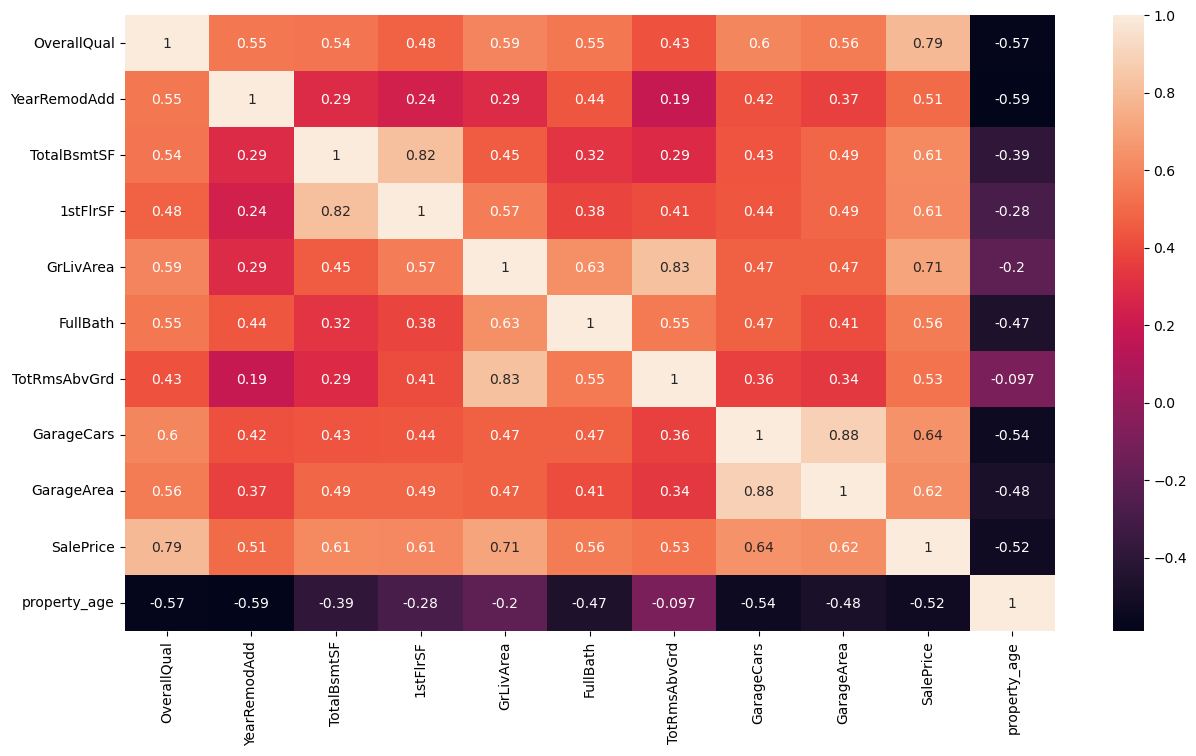

In [177]:
plt.figure(figsize=(15,8))
sns.heatmap(cor, annot=True);

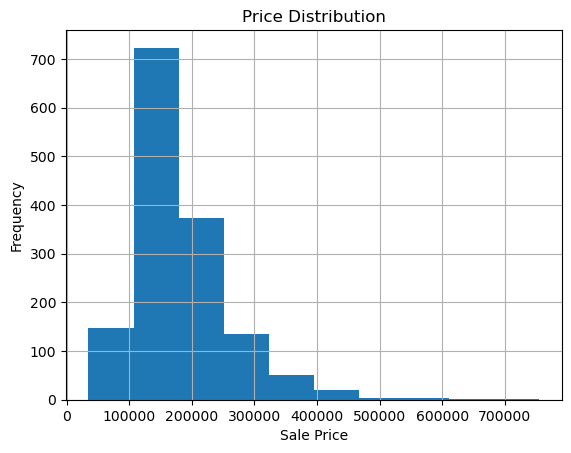

In [179]:
# check for outliers in the price
df_train.SalePrice.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

In [180]:
# drop any properties having a saleprice above 450K
mask= df_train['SalePrice']<450000
df_train1=df_train[mask]

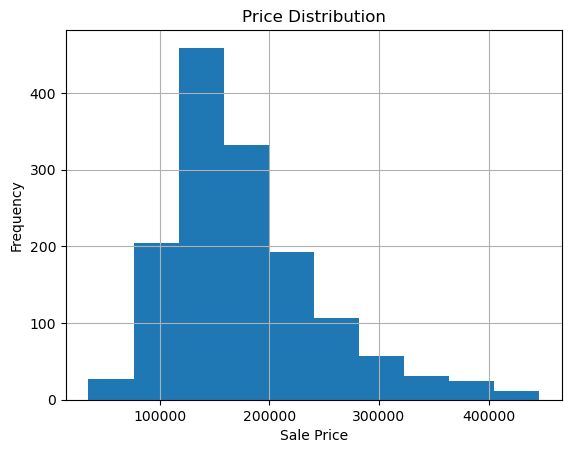

In [181]:
# check for outliers in the price after slicing
df_train1.SalePrice.hist()
plt.title('Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

In [190]:
df_train1.isnull().sum().sort_values(ascending=False)

GarageType       81
GarageCond       81
GarageQual       81
BsmtFinType2     38
BsmtFinType1     37
Electrical        1
SaleType          0
GarageArea        0
GarageCars        0
HeatingQC         0
Functional        0
TotRmsAbvGrd      0
FullBath          0
GrLivArea         0
1stFlrSF          0
SaleCondition     0
SalePrice         0
MSZoning          0
TotalBsmtSF       0
Heating           0
LotConfig         0
Foundation        0
ExterCond         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
RoofStyle         0
YearRemodAdd      0
OverallQual       0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
property_age      0
dtype: int64

In [184]:
# this feature has missing values and therefore we will check for outliers
#df_train1['LotFrontage'].hist();
# I will use median to impute the missing values


In [186]:
# # drop any properties having a LotFrontage above 150K
# mask= df_train1['LotFrontage']<150000
# df_train2=df_train1[mask]

In [192]:
# this feature has missing values and therefore we will check for outliers
#df_train2['garage_age'].hist();
# I will use median to impute the missing values


In [194]:
df_train1.isnull().sum()

MSZoning          0
LotConfig         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterCond         0
Foundation        0
BsmtFinType1     37
BsmtFinType2     38
TotalBsmtSF       0
Heating           0
HeatingQC         0
Electrical        1
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Functional        0
GarageType       81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
SaleType          0
SaleCondition     0
SalePrice         0
property_age      0
dtype: int64

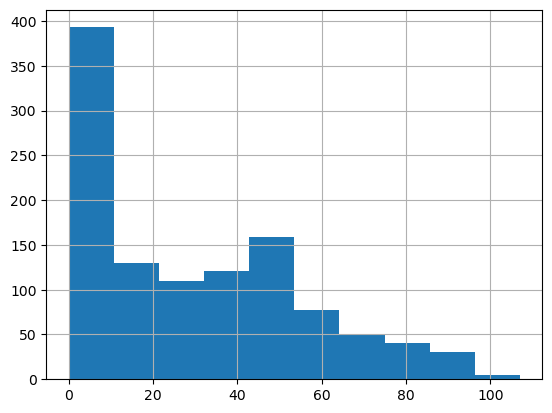

In [189]:
# this feature has missing values and therefore we will check for outliers
df_train2['garage_age'].hist();
# I will use mean to impute the missing values since it does not have outliers


In [195]:
# there is no high cardinality
df_objects=df_train1.select_dtypes('object').nunique()
#print(df_objects)
mask_ob=df_objects<5
bool=mask_ob.to_list()
len(mask_ob)
df_objects.iloc[bool].index


Index([], dtype='object')

In [196]:
X=df_train1.drop('SalePrice', axis=1)
y=df_train1['SalePrice']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)

In [198]:
print(X_train.shape, X_test.shape)

(1301, 34) (145, 34)


In [199]:
X_train.columns


Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Functional', 'GarageType', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType', 'SaleCondition', 'property_age'],
      dtype='object')

In [200]:
### Baseline

In [201]:
y_mean = y_train.mean()
y_mean

176677.4019984627

In [202]:
y_mean_predictions=[y_mean]*len(y_train)
mae=mean_absolute_error(y_mean_predictions, y_train)
r2=r2_score(y_mean_predictions, y_train)
print('Baseline MAE',round(mae,2))
print('Baseline R2',round(r2,2))

Baseline MAE 53767.94
Baseline R2 -5.862501916893892e+30


In [203]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [204]:
X_train.select_dtypes('object').columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional',
       'GarageType', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [205]:
column_transform=make_column_transformer((SimpleImputer(strategy='median'), X_train.select_dtypes(exclude='object').columns),
                        (SimpleImputer(strategy='most_frequent'), X_train.select_dtypes(include='object').columns)
                        ,remainder='passthrough')

In [206]:
from xgboost import XGBRegressor
model= make_pipeline(
    
    column_transform,
   
    OneHotEncoder(use_cat_names=True),
    MinMaxScaler(),
    
    #CatBoostRegressor(logging_level='Silent')
    XGBRegressor(max_depth=6,
             learning_rate=0.05579235276617039, 
            subsample=0.6180506439049763,
             gamma=2.0791752419917375,
             alpha=0.3523524041733057 )
    
    



)

## Use GridSearchCV

In [207]:
%%time
from xgboost import XGBRegressor
# Choose the type of classifier. 
xgb_tuned = model

# Grid of parameters to choose from

parameters = {
    "xgbregressor__n_estimators": [10, 50, 100],
    "xgbregressor__subsample":[0.6, 0.8, 1],
    "xgbregressor__learning_rate":[0.01, 0.1, 0.5, 1],
    "xgbregressor__gamma":[0.01, 0.1, 1, 5],
    "xgbregressor__colsample_bytree":[0.5, 0.7, 0.9, 1],
    "xgbregressor__alpha":[0, 0.1, 0.5]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,
                        cv=5, n_jobs=-1, verbose=2)

#grid_obj = grid_obj.fit(X_train, y_train)

CPU times: user 73 µs, sys: 6 µs, total: 79 µs
Wall time: 83.4 µs


In [208]:
#grid_obj.best_params

## Method 2: Randomized Search

In [209]:
%%time
# Run the grid search
rand_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,
                              n_iter=20, n_jobs=-1, cv=5, verbose=1)

#rand_obj = rand_obj.fit(X_train, y_train)

CPU times: user 26 µs, sys: 2 µs, total: 28 µs
Wall time: 33.4 µs


In [210]:
#rand_obj.best_params_

{'xgbregressor__subsample': 0.6,
 'xgbregressor__n_estimators': 100,
 'xgbregressor__learning_rate': 0.1,
 'xgbregressor__gamma': 0.01,
 'xgbregressor__colsample_bytree': 0.5,
 'xgbregressor__alpha': 0.1}

In [211]:
#rand_obj.cv_results_

## Method 3: Bayesian Search on the same search space as Grid Search

In [212]:
pip install scikit-optimize

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [213]:
%%time
from skopt import BayesSearchCV
bayes = BayesSearchCV(xgb_tuned,
                      search_spaces=parameters, # same space as GridSearch
                      n_iter=20, cv=5)

#bayes.fit(X_train, y_train)

CPU times: user 8.42 ms, sys: 1.03 ms, total: 9.45 ms
Wall time: 9 ms


In [214]:
#bayes.best_params_

OrderedDict([('xgbregressor__alpha', 0.5),
             ('xgbregressor__colsample_bytree', 0.9),
             ('xgbregressor__gamma', 0.1),
             ('xgbregressor__learning_rate', 0.1),
             ('xgbregressor__n_estimators', 100),
             ('xgbregressor__subsample', 0.6)])

Method 4: Using continuous Search Spaces for Bayesian Search

In [215]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score

bayes_space = model

space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Real(0.5, 1,"uniform", name='subsample'),
          Real(10**-5, 10**1, "uniform", name='gamma'),
          Real(10**-5, 10**0, "uniform", name='alpha'),]

# The decorator below enables the objective function
# to receive the parameters as keyword arguments.
@use_named_args(space)
def objective(**params):
    '''
    Scitkit Learn Optimize requires an objective function to minimize.
    We use the average of cross-validation mean absolute errors as 
    the objective function (also called cost function in optimization)
    '''
    xgb_tuned.named_steps['xgbregressor'].set_params(**params)

    return -np.mean(cross_val_score(xgb_tuned, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [216]:
# %%time
# from skopt import gp_minimize
# res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)

In [217]:
# res_gp.x

[6,
 0.05579235276617039,
 0.6180506439049763,
 2.0791752419917375,
 0.3523524041733057]

In [218]:
XGBRegressor(max_depth=6,
             learning_rate=0.05579235276617039, 
            subsample=0.6180506439049763,
             gamma=2.0791752419917375,
             alpha=0.3523524041733057 )

XGBRegressor(alpha=0.3523524041733057, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=2.0791752419917375, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05579235276617039, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, ...)

In [219]:
XGBRegressor(max_depth=6,
             learning_rate=0.055, \
            subsample=0.6180506,\
             gamma=2.0791752,\
             alpha=0.352352404 )

XGBRegressor(alpha=0.352352404, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=2.0791752,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.055, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, ...)

In [220]:
XGBRegressor

xgboost.sklearn.XGBRegressor

## Iterate

In [221]:
%%time
model.fit(X_train, y_train)

CPU times: user 33 s, sys: 149 ms, total: 33.2 s
Wall time: 9.58 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'property_age'],
      dtype='object')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most...
                              gamma=2.0791752419917375, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.05579235276617039, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                 

## Evaluate

In [222]:

predictions=model.predict(X_train)
mae=mean_absolute_error(predictions, y_train)
r2=r2_score(predictions, y_train)
print('Training MAE',round(mae,2))
print('Training R2',round(r2,2))

Training MAE 13126.5
Training R2 0.93


In [224]:
predictions=model.predict(X_test)

mae=mean_absolute_error(predictions, y_test)
r2=r2_score(predictions, y_test)
print('testing MAE',round(mae,2))
print('Test R2',round(r2,2))

testing MAE 21332.69
Test R2 0.7


In [225]:
test_predictions=pd.Series(predictions)
test_predictions

0      209106.937500
1      185609.156250
2      109147.507812
3      204820.421875
4      267445.750000
           ...      
140    200957.546875
141    289197.312500
142    125930.304688
143    103591.507812
144    181658.359375
Length: 145, dtype: float32

In [226]:
# Plot the model
pred_df1=y_test.to_frame('True test Y')
pred_df1.reset_index(inplace=True)
pred_df1.drop('index', axis=1, inplace=True)


In [227]:
pred_df=pd.concat([pred_df1, test_predictions], axis=1)
pred_df.columns=['True test Y', 'Model Predictions']
pred_df

,True test Y,Model Predictions
0,155835,209106.937500
1,188000,185609.156250
2,66500,109147.507812
3,239000,204820.421875
4,277500,267445.750000
...,...,...
140,205000,200957.546875
141,249700,289197.312500
142,124000,125930.304688
143,92000,103591.507812


<AxesSubplot:xlabel='True test Y', ylabel='Model Predictions'>

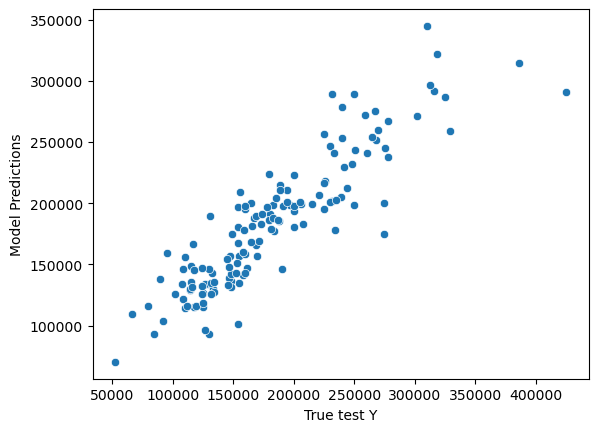

In [228]:
sns.scatterplot(x='True test Y', y='Model Predictions', data=pred_df)

In [229]:
test_pred=model.predict(df_test)

In [119]:
sub=pd.read_csv('/kaggle/input/home-data-for-ml-course/sample_submission.csv')

In [120]:
sub['SalePrice']=test_pred

In [121]:
sub.head()

,Id,SalePrice
0,1461,119233.757812
1,1462,143328.703125
2,1463,180922.796875
3,1464,191989.562500
4,1465,202555.968750


In [122]:
sub.to_csv('submission1.csv', index=False)

## Communicate Results

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as:

<center><img src="../images/proj-2.003.png" alt="Equation: y = m*x + b" style="width: 400px;"/></center>

Since data scientists often work with more complicated linear models, they prefer to write the equation as:

<center><img src="../images/proj-2.004.png" alt="Equation: y = beta 0 + beta 1 * x" style="width: 400px;"/></center>

Regardless of how we write the equation, we need to find the values that our model has determined for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this information in the model itself. Let's start with the intercept.

In [123]:
imp = model.named_steps['xgbregressor'].feature_importances_
print("Feature importances:", imp)
feat=model.named_steps['onehotencoder'].get_feature_names_in()
feat




Feature importances: [0.00029091 0.00125265 0.00053675 ... 0.00023412 0.00198724 0.        ]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [124]:
def make_prediction(area, quality,age, neighborhood):
    data={'LotArea' : area,
         'OverallQual': quality,
         'LotFrontage': age,
          'Neighborhood':neighborhood}
    df=pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)
    return f"Predicted apartment price: ${prediction}"

In [125]:
interact(
    make_prediction,
    quality=IntSlider(
        min=X_train["OverallQual"].min(),
        max=X_train["OverallQual"].max(),
        value=X_train["OverallQual"].mean(),
    ),
    age=FloatSlider(
        min=X_train["LotFrontage"].min(),
        max=X_train["LotFrontage"].max(),
        step=0.01,
        value=X_train["LotFrontage"].mean(),
    ),
    area=FloatSlider(
        min=X_train["LotArea"].min(),
        max=X_train["LotArea"].max(),
        step=0.01,
        value=X_train["LotArea"].mean(),
    ),
    neighborhood=Dropdown(options=sorted(X_train["Neighborhood"].unique())),
);

interactive(children=(FloatSlider(value=9760.160898035547, description='area', max=215245.0, min=1300.0, step=…

In [126]:
data={'LotArea' : 12,
         'OverallQual': 1,
         'LotFrontage': 23,
          'Neighborhood':2}

df=pd.DataFrame(data, index=[0])
df

,LotArea,OverallQual,LotFrontage,Neighborhood
0,12,1,23,2
